In [2]:
import os 
import sys #imports library for working with system commands
import pandas as pd  #Imports pandas for working with dataframes, with the abbreviation 'pd'
import matplotlib #Imports matplotlib for graphing and such
import matplotlib.pyplot as plt  #Imports the major matplotlib library for making charts (pyplot) as 'plot'
import numpy as np #imports numpy, which has many math like commands, as 'np'
import seaborn as sns #imports advanced graphing library (seaborn) as 'sb'
import statsmodels.formula.api as smf
import statsmodels.api as sm #imports a model for running functions for a number of statistical models and tests as 'sm'
import statsmodels.formula.api as smf #getting formula
import plotly.plotly as py #imports plotly
import plotly.graph_objs as go #imports plotly graph objects as 'go'
#Make matplotlib inline, to display the results of analysis on the screen.  This is a 'magic' command (passthrough)
%matplotlib inline
plt.style.use('seaborn-deep')

C:\Users\baxte\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
os.chdir("C:\\Users\\baxte\\Google Drive\\Laptop Backup 3_16_2018\\Georgia Tech\\Spring 2018\\IPE\\Research\\Data")

In [4]:
ChinaData = pd.read_excel("CHINADATA.xlsx") #Importing compiled China Data
ChinaDataGunter = pd.read_excel("CHINADATAGunter.xlsx") #Importing compiled China Data using Gunter's numbers

I've imported a whole ton of data here. 

DV: The dependent variable I'm going to be looking at for my analysis is capital flight. For that, and for now, I am using net errors and omissions as my actual measure of capital flight from China. This is used by Cuddington and others as a measure of capital flight from a country. The Net Errors and Omissions are reported in billions of USD.

IV: I have included GDP Growth %, Real Interest Rate %, the RMB to USD exchange rate, and Total Reserves minus Gold USD. All of this data is annualized.

The only difference between "ChinaData" and "ChinaDataGunter" is that the latter includes the full Cuddington model as estimated by Gunter in his 2017 paper looking at the capital flight from 1982-2014.

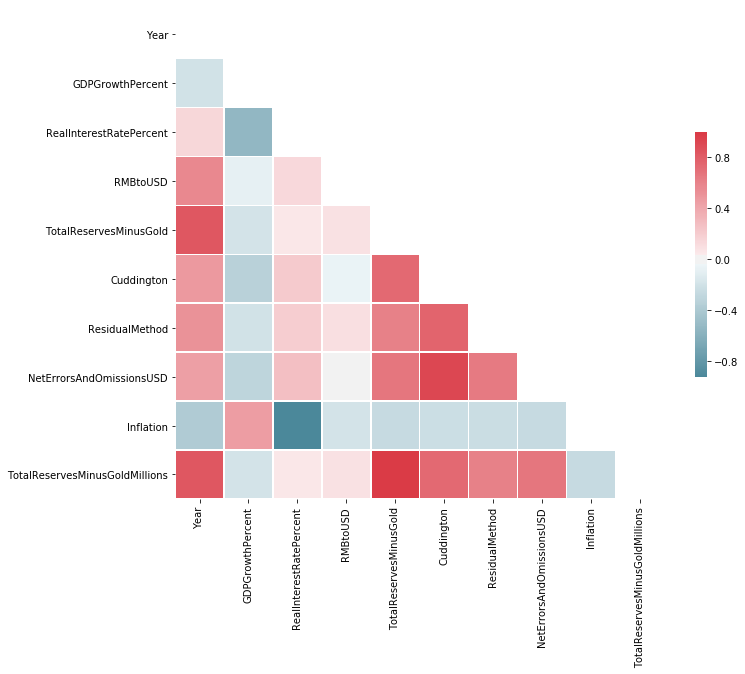

In [16]:
corr = ChinaDataGunter.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [98]:
corr

,Year,GDPGrowthPercent,RealInterestRatePercent,RMBtoUSD,TotalReservesMinusGold,Cuddington,ResidualMethod,NetErrorsAndOmissionsUSD,TotalReservesMinusGoldMillions
Year,1.000000,-0.199801,0.149271,0.575631,0.839785,0.480700,0.514216,0.450926,0.839785
GDPGrowthPercent,-0.199801,1.000000,-0.545088,-0.086603,-0.190019,-0.336200,-0.199235,-0.301041,-0.190019
RealInterestRatePercent,0.149271,-0.545088,1.000000,0.132028,0.059583,0.215887,0.197225,0.278210,0.059583
RMBtoUSD,0.575631,-0.086603,0.132028,1.000000,0.090308,-0.051771,0.099734,0.008773,0.090308
TotalReservesMinusGold,0.839785,-0.190019,0.059583,0.090308,1.000000,0.740282,0.613268,0.670836,1.000000
Cuddington,0.480700,-0.336200,0.215887,-0.051771,0.740282,1.000000,0.761274,0.919044,0.740282
ResidualMethod,0.514216,-0.199235,0.197225,0.099734,0.613268,0.761274,1.000000,0.652233,0.613268
NetErrorsAndOmissionsUSD,0.450926,-0.301041,0.278210,0.008773,0.670836,0.919044,0.652233,1.000000,0.670836
TotalReservesMinusGoldMillions,0.839785,-0.190019,0.059583,0.090308,1.000000,0.740282,0.613268,0.670836,1.000000


In [24]:
X = ChinaData['GDPGrowthPercent']
Y = ChinaData['NetErrorsAndOmissionsUSD']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetErrorsAndOmissionsUSD   R-squared:                       0.148
Model:                                  OLS   Adj. R-squared:                  0.121
Method:                       Least Squares   F-statistic:                     5.393
Date:                      Thu, 26 Apr 2018   Prob (F-statistic):             0.0270
Time:                              19:15:03   Log-Likelihood:                -404.68
No. Observations:                        33   AIC:                             813.4
Df Residuals:                            31   BIC:                             816.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.032e+05   3.48e+04      2.962      0.006    3.21e+04    1.74e+05
GDPGrowthPercent -7928.4384   3414.170     -2.322      0.027   -1.49e+04    -965.193
==============================================================================
Omnibus:                       29.173   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.556
Skew:                           2.102   Prob(JB):                     1.17e-13
Kurtosis:                       8.063   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is fine to begin with. I now want to see what the results are when I check the capital flight versus interest rate percentages.

There is no statistically significant relationship between these two variables. Furthermore, the data crosses the zero.

There is even less of a statistically significant relationship here.

In [15]:
ChinaData['TotalReservesMinusGoldMillions'] = ChinaData['TotalReservesMinusGold']/1000000
ChinaDataGunter['TotalReservesMinusGoldMillions'] = ChinaDataGunter['TotalReservesMinusGold']/1000000

In [25]:
X = ChinaData['RealInterestRatePercent']
Y = ChinaData['NetErrorsAndOmissionsUSD']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetErrorsAndOmissionsUSD   R-squared:                       0.061
Model:                                  OLS   Adj. R-squared:                  0.030
Method:                       Least Squares   F-statistic:                     1.998
Date:                      Thu, 26 Apr 2018   Prob (F-statistic):              0.167
Time:                              19:17:03   Log-Likelihood:                -406.29
No. Observations:                        33   AIC:                             816.6
Df Residuals:                            31   BIC:                             819.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.778e+04    1.1e+04      1.618      0.116   -4627.911    4.02e+04
RealInterestRatePercent  4076.8470   2883.871      1.414      0.167   -1804.847    9958.541
==============================================================================
Omnibus:                       36.394   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.343
Skew:                           2.584   Prob(JB):                     5.38e-21
Kurtosis:                       9.417   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = ChinaData['Inflation']
Y = ChinaData['NetErrorsAndOmissionsUSD']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetErrorsAndOmissionsUSD   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.083
Method:                       Least Squares   F-statistic:                     3.902
Date:                      Thu, 26 Apr 2018   Prob (F-statistic):             0.0572
Time:                              19:20:14   Log-Likelihood:                -405.37
No. Observations:                        33   AIC:                             814.7
Df Residuals:                            31   BIC:                             817.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.61e+04   1.42e+04      3.255      0.003    1.72e+04     7.5e+04
Inflation  -3813.8517   1930.816     -1.975      0.057   -7751.778     124.074
==============================================================================
Omnibus:                       31.874   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.173
Skew:                           2.307   Prob(JB):                     9.54e-16
Kurtosis:                       8.387   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X = ChinaData['TotalReservesMinusGoldMillions']
Y = ChinaData['NetErrorsAndOmissionsUSD']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetErrorsAndOmissionsUSD   R-squared:                       0.404
Model:                                  OLS   Adj. R-squared:                  0.385
Method:                       Least Squares   F-statistic:                     21.00
Date:                      Thu, 26 Apr 2018   Prob (F-statistic):           7.08e-05
Time:                              19:21:24   Log-Likelihood:                -398.79
No. Observations:                        33   AIC:                             801.6
Df Residuals:                            31   BIC:                             804.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1796.7674   9688.457     -0.185      0.854   -2.16e+04     1.8e+04
TotalReservesMinusGoldMillions     0.0263      0.006      4.583      0.000       0.015       0.038
==============================================================================
Omnibus:                       24.422   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.106
Skew:                           1.726   Prob(JB):                     9.73e-11
Kurtosis:                       7.649   Cond. No.                     2.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = ChinaData['GDPGrowthPercent']
Y = ChinaData['Cuddington']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cuddington   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     7.029
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0125
Time:                        19:23:13   Log-Likelihood:                -417.36
No. Observations:                  33   AIC:                             838.7
Df Residuals:                      31   BIC:                             841.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.701e+05   5.12e+04      3.325      0.002    6.58e+04    2.74e+05
GDPGrowthPercent -1.329e+04   5013.566     -2.651      0.013   -2.35e+04   -3067.112
==============================================================================
Omnibus:                        8.333   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.894
Skew:                           1.043   Prob(JB):                       0.0318
Kurtosis:                       3.816   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X = ChinaData['RealInterestRatePercent']
Y = ChinaData['Cuddington']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cuddington   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.030
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.164
Time:                        19:24:06   Log-Likelihood:                -419.68
No. Observations:                  33   AIC:                             843.4
Df Residuals:                      31   BIC:                             846.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.812e+04   1.65e+04      1.706      0.098   -5494.096    6.17e+04
RealInterestRatePercent  6164.8529   4326.955      1.425      0.164   -2660.031     1.5e+04
==============================================================================
Omnibus:                       15.342   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.253
Skew:                           1.516   Prob(JB):                     0.000296
Kurtosis:                       4.620   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = ChinaData['TotalReservesMinusGoldMillions']
Y = ChinaData['Cuddington']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cuddington   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     42.35
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           2.92e-07
Time:                        19:24:31   Log-Likelihood:                -406.52
No. Observations:                  33   AIC:                             817.0
Df Residuals:                      31   BIC:                             820.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -9099.3538   1.22e+04     -0.743      0.463   -3.41e+04    1.59e+04
TotalReservesMinusGoldMillions     0.0472      0.007      6.508      0.000       0.032       0.062
==============================================================================
Omnibus:                        3.782   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.853
Skew:                           0.222   Prob(JB):                        0.240
Kurtosis:                       4.370   Cond. No.                     2.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = ChinaData['Inflation']
Y = ChinaData['Cuddington']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cuddington   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.907
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0570
Time:                        19:24:57   Log-Likelihood:                -418.77
No. Observations:                  33   AIC:                             841.5
Df Residuals:                      31   BIC:                             844.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.074e+04   2.13e+04      3.327      0.002    2.74e+04    1.14e+05
Inflation  -5728.3993   2898.159     -1.977      0.057   -1.16e+04     182.436
==============================================================================
Omnibus:                       10.796   Durbin-Watson:                   0.252
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.807
Skew:                           1.236   Prob(JB):                      0.00742
Kurtosis:                       4.009   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X = ChinaDataGunter['GDPGrowthPercent']
Y = ChinaDataGunter['ResidualMethod']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ResidualMethod   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.199
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.283
Time:                        22:57:28   Log-Likelihood:                -392.79
No. Observations:                  31   AIC:                             789.6
Df Residuals:                      29   BIC:                             792.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.064e+05   5.58e+04      1.907      0.066   -7703.639     2.2e+05
GDPGrowthPercent -5879.5219   5370.097     -1.095      0.283   -1.69e+04    5103.559
==============================================================================
Omnibus:                       34.256   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.047
Skew:                           2.487   Prob(JB):                     9.26e-19
Kurtosis:                       9.289   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X = ChinaDataGunter['RealInterestRatePercent']
Y = ChinaDataGunter['ResidualMethod']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ResidualMethod   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.174
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.288
Time:                        19:25:59   Log-Likelihood:                -392.81
No. Observations:                  31   AIC:                             789.6
Df Residuals:                      29   BIC:                             792.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.967e+04    1.6e+04      2.485      0.019    7016.696    7.23e+04
RealInterestRatePercent  4533.3896   4184.535      1.083      0.288   -4024.946    1.31e+04
==============================================================================
Omnibus:                       36.103   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.744
Skew:                           2.617   Prob(JB):                     7.26e-21
Kurtosis:                       9.664   Cond. No.                         4.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = ChinaDataGunter['TotalReservesMinusGold']
Y = ChinaDataGunter['ResidualMethod']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ResidualMethod   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     17.48
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           0.000244
Time:                        19:26:14   Log-Likelihood:                -386.11
No. Observations:                  31   AIC:                             776.2
Df Residuals:                      29   BIC:                             779.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.351e+04   1.41e+04      0.959      0.345   -1.53e+04    4.23e+04
TotalReservesMinusGold  3.817e-08   9.13e-09      4.181      0.000    1.95e-08    5.68e-08
==============================================================================
Omnibus:                       10.118   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.402
Skew:                           0.806   Prob(JB):                      0.00334
Kurtosis:                       5.496   Cond. No.                     1.88e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = ChinaDataGunter['Inflation']
Y = ChinaDataGunter['ResidualMethod']
results = sm.OLS(Y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ResidualMethod   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.689
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.204
Time:                        19:26:55   Log-Likelihood:                -392.54
No. Observations:                  31   AIC:                             789.1
Df Residuals:                      29   BIC:                             792.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.937e+04   2.21e+04      3.138      0.004    2.42e+04    1.15e+05
Inflation  -3797.0185   2921.507     -1.300      0.204   -9772.172    2178.135
==============================================================================
Omnibus:                       34.576   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.309
Skew:                           2.514   Prob(JB):                     4.93e-19
Kurtosis:                       9.324   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

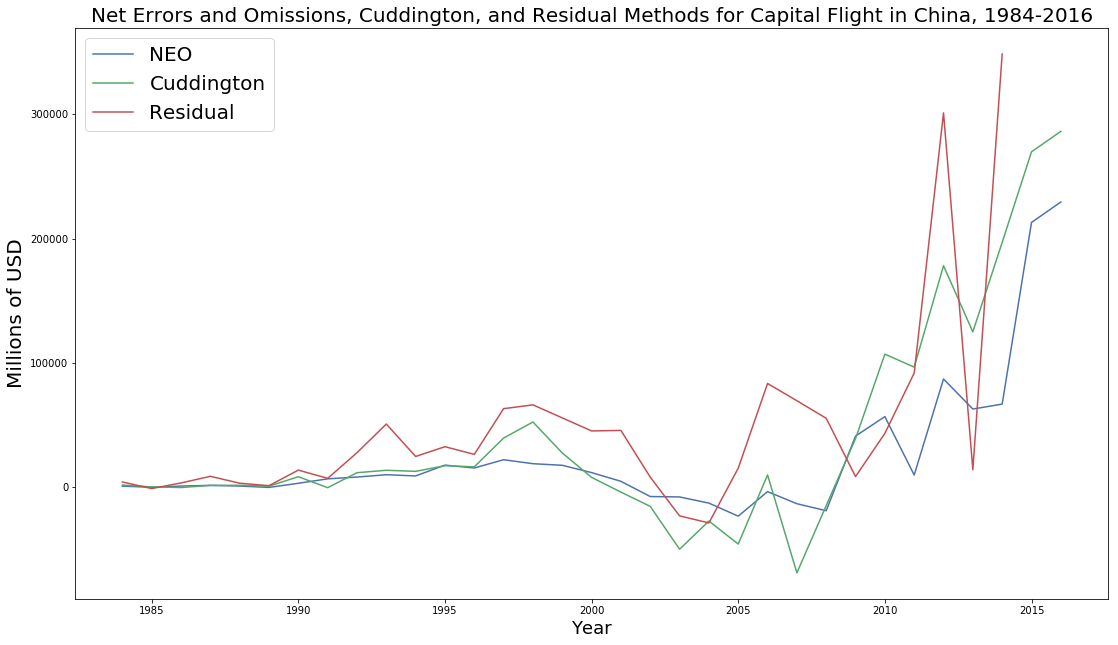

In [23]:
plt.plot(ChinaData['Year'], ChinaData['NetErrorsAndOmissionsUSD'], label='NEO')
plt.plot(ChinaData['Year'], ChinaData['Cuddington'], label='Cuddington')
plt.plot(ChinaDataGunter['Year'], ChinaDataGunter['ResidualMethod'], label='Residual')
plt.title('Net Errors and Omissions, Cuddington, and Residual Methods for Capital Flight in China, 1984-2016', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.legend(loc='upper left', prop={'size': 20})
plt.ylabel('Millions of USD', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [38]:
est = smf.ols(formula='NetErrorsAndOmissionsUSD ~ GDPGrowthPercent * TotalReservesMinusGoldMillions', data = ChinaData).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetErrorsAndOmissionsUSD   R-squared:                       0.662
Model:                                  OLS   Adj. R-squared:                  0.627
Method:                       Least Squares   F-statistic:                     18.91
Date:                      Thu, 26 Apr 2018   Prob (F-statistic):           5.44e-07
Time:                              19:49:07   Log-Likelihood:                -389.44
No. Observations:                        33   AIC:                             786.9
Df Residuals:                            29   BIC:                             792.9
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        1943.6832   2.74e+04      0.071      0.944    -5.4e+04    5.79e+04
GDPGrowthPercent                                  409.5691   2598.701      0.158      0.876   -4905.372    5724.510
TotalReservesMinusGoldMillions                      0.1122      0.021      5.275      0.000       0.069       0.156
GDPGrowthPercent:TotalReservesMinusGoldMillions    -0.0106      0.002     -4.265      0.000      -0.016      -0.006
==============================================================================
Omnibus:                        9.490   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.042
Skew:                           0.786   Prob(JB):                      0.00660
Kurtosis:                       5.198   Cond. No.                     6.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

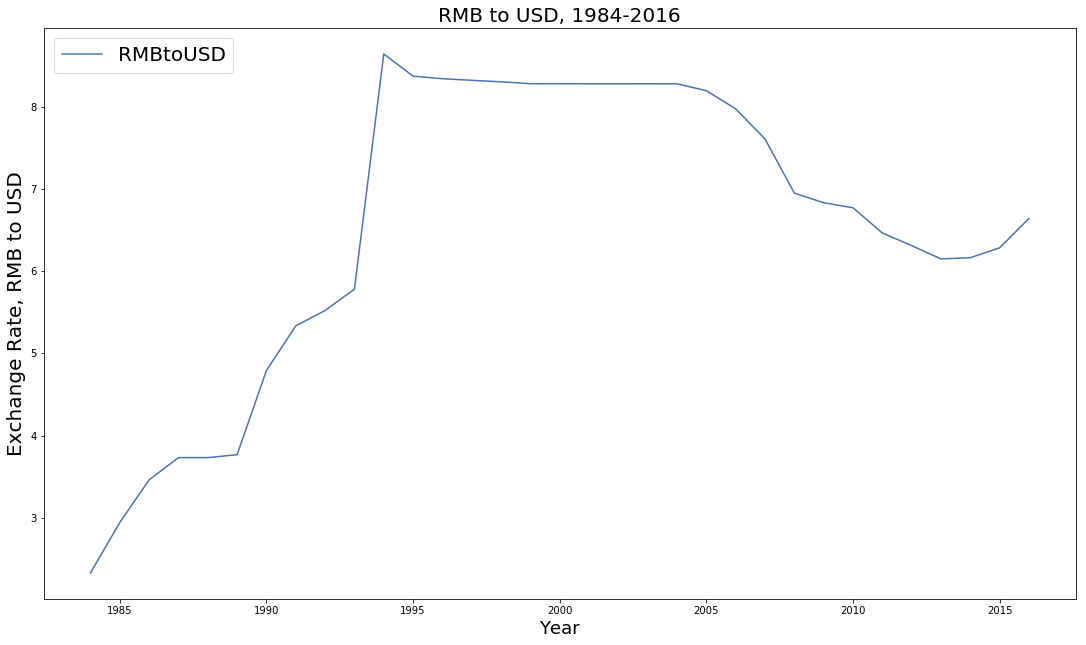

In [53]:
plt.plot(ChinaData['Year'], ChinaData['RMBtoUSD'])
plt.title('RMB to USD, 1984-2016', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.legend(loc='upper left', prop={'size': 20})
plt.ylabel('Exchange Rate, RMB to USD', fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

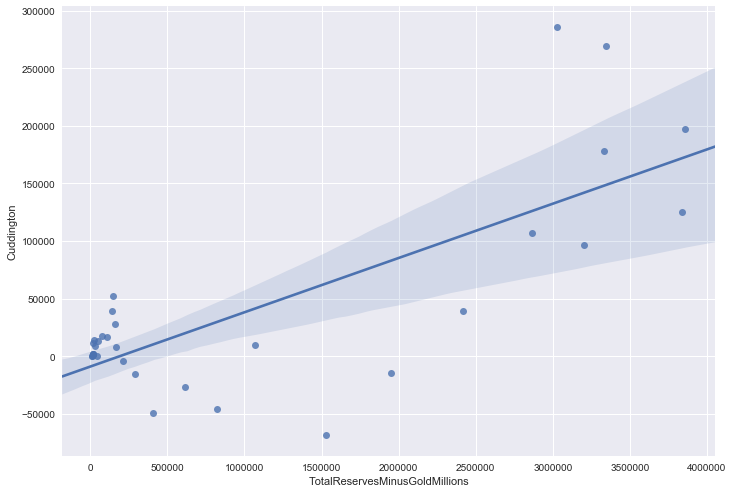

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.regplot(x="TotalReservesMinusGoldMillions", y="Cuddington", data=ChinaData, label='Regression')